In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# upload all files from folder /data/results_artificial
# and create a dataframe with all the data
def create_dataframe(path):
    df = pd.DataFrame()
    files = os.listdir(path)
    for file in files:
        df_temp = pd.read_csv(path + file)
        df = pd.concat([df, df_temp])
    return df


In [6]:
arti = create_dataframe('data/results_artificial/').drop_duplicates().reset_index(drop=True)

In [46]:
arti.sort_values('Performance_score', ascending=False).head(1)

,Selector,Classifier,Number_of_Features,Accuracy,Performance_score,Supported_Features,alpha,l1_ratio,Number_of_features
295,RFE,XGBClassifier,10,0.854167,0.8442,[False False False False False False False Fal...,NaN,NaN,"(0.999, 10.0]"


In [26]:
arti['Number_of_features'] = pd.qcut(arti['Number_of_Features'], 7)

Text(0, 0.5, 'Accuracy')

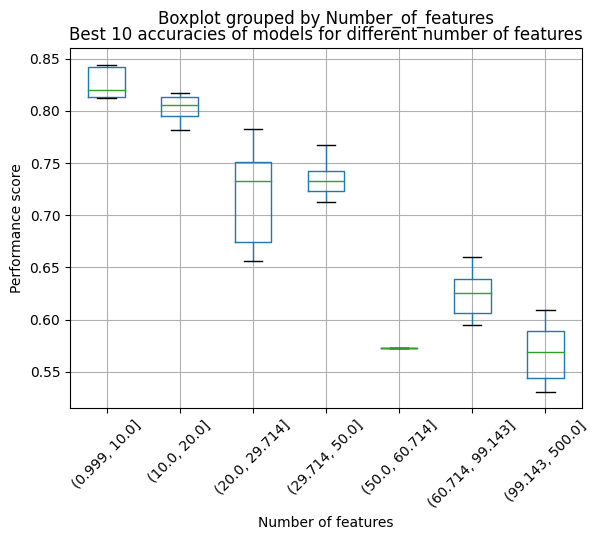

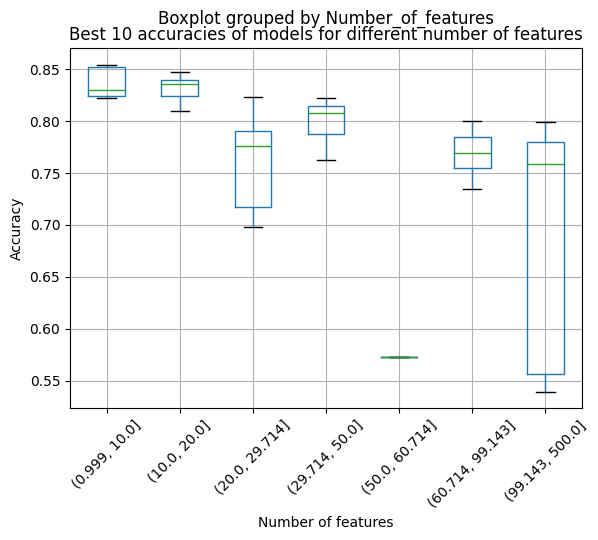

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

res1 = arti.groupby('Number_of_features').apply(lambda x: x.nlargest(10, 'Performance_score')).droplevel(0)

res1.boxplot(column='Performance_score', by=['Number_of_features'])
plt.xticks(rotation=45)
plt.title('Best 10 accuracies of models for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Performance score')

res2 = arti.groupby('Number_of_features').apply(lambda x: x.nlargest(10, 'Accuracy')).droplevel(0)

res1.boxplot(column='Accuracy', by=['Number_of_features'])
plt.xticks(rotation=45)
plt.title('Best 10 accuracies of models for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

In [40]:
sms = create_dataframe('data/results_sms/').drop_duplicates().reset_index(drop=True)

In [42]:
sms['Number_of_features'] = pd.qcut(sms['Number_of_Features'], 7)

In [47]:
sms.sort_values('Performance_score', ascending=False).head(1)

,Selector,Classifier,Number_of_Features,Accuracy,Performance_score,Supported_Features,alpha,l1_ratio,Number_of_features
51,PCA,XGBClassifier,75,0.949465,0.9495,NaN,NaN,NaN,"(50.0, 75.0]"


Text(0, 0.5, 'Accuracy')

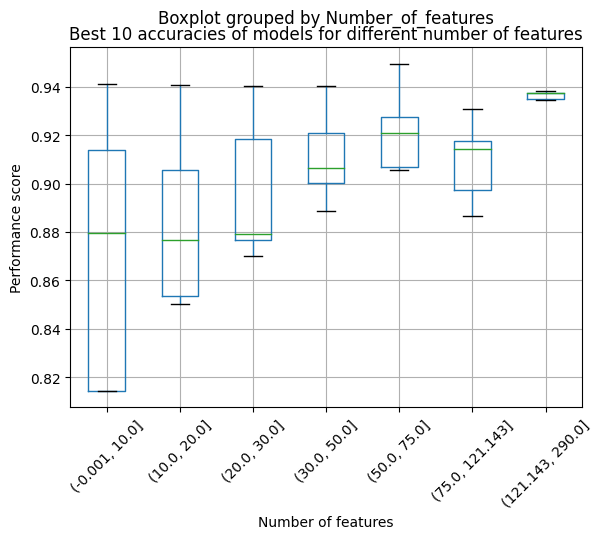

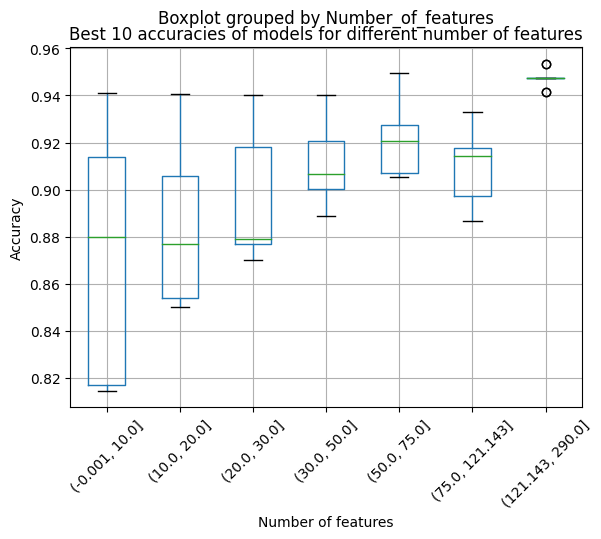

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

res1 = sms.groupby('Number_of_features').apply(lambda x: x.nlargest(10, 'Performance_score')).droplevel(0)

res1.boxplot(column='Performance_score', by=['Number_of_features'])
plt.xticks(rotation=45)
plt.title('Best 10 accuracies of models for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Performance score')

res2 = sms.groupby('Number_of_features').apply(lambda x: x.nlargest(10, 'Accuracy')).droplevel(0)

res1.boxplot(column='Accuracy', by=['Number_of_features'])
plt.xticks(rotation=45)
plt.title('Best 10 accuracies of models for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')